<a href="https://colab.research.google.com/github/kourosh89/Natural-Language-Processing-on-SPAM-data/blob/main/Github_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense,Flatten, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical, pad_sequences
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
# download dataset "https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?resource=download"
df = pd.read_csv('spam.csv', encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df[['v1','v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

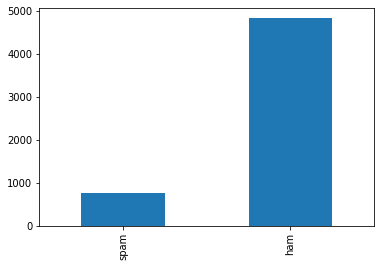

In [ ]:
df['v1'].value_counts().sort_values().plot(kind='bar')
plt.show()

In [ ]:
x = df['v2']
y = df['v1']
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
x.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [ ]:
y=pd.Series(y)
y.head()

0    0
1    0
2    1
3    0
4    0
dtype: int64

In [ ]:
#split data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
x_train.shape

(4457,)

In [ ]:
max_word = 1000
max_len = 250
token = Tokenizer(num_words=max_word)
token.fit_on_texts(x_train)
sequence = token.texts_to_sequences(x_train)
print(sequence[0])

[140, 94, 6, 159]


In [ ]:
print(type(sequence))
print(len(sequence))

<class 'list'>
4457


we have to use pad_sequences to fill out any list to specify number

In [ ]:
seq_matrix = pad_sequences(sequence , maxlen = max_len)
print(seq_matrix[0])
print(seq_matrix.shape)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 14

Define Model

In [ ]:
model = Sequential()
model.add(Embedding(max_word , 32 , input_length = max_len))
model.add(LSTM(64))
model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(loss = 'binary_crossentropy' , optimizer = 'RMSprop' , metrics = 'accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 32)           32000     
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 500)               32500     
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 250)               125250    
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
# train
model.fit(seq_matrix, y_train, batch_size=128, epochs=20,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.001)])


Epoch 1/20
28/28 [==============================] - 13s 175ms/step - loss: 0.3659 - accuracy: 0.8597 - val_loss: 0.1671 - val_accuracy: 0.8666
Epoch 2/20
28/28 [==============================] - 3s 98ms/step - loss: 0.1319 - accuracy: 0.9630 - val_loss: 0.0835 - val_accuracy: 0.9753


In [ ]:
# prepare test sequence
print(x_test[:5])
test_seq = token.texts_to_sequences(x_test)
test_seq_matrix = pad_sequences(test_seq,maxlen=max_len)

1740    UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...
2333                    What happen to her tell the truth
4122    Cool, want me to go to kappa or should I meet ...
901           How is it possible to teach you. And where.
1232                          1's finish meeting call me.
Name: v2, dtype: object


In [ ]:
# model evaluation
scores = model.evaluate(test_seq_matrix, y_test, verbose=0)
scores
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 97.76%


In [ ]:
# pridiction
print(x_test[7:8])
print(test_seq_matrix[7:8])
model.predict(test_seq_matrix[:1])

1143    And is there a way you can send shade's stuff ...
Name: v2, dtype: object
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0 

array([[0.9117146]], dtype=float32)